In [450]:
# 1. Import packages
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
print(keras.backend.backend())

tensorflow


In [451]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [452]:
# 2. Constant
CSV_PATH_train = os.path.join(os.getcwd(),'datasets','cases_malaysia_train.csv')
CSV_PATH_test = os.path.join(os.getcwd(),'datasets','cases_malaysia_test.csv')

print(os.getcwd())


c:\Users\suhaimi\Desktop\Capston Project\capstone project 1


In [453]:
# 3. Data Loading
df_train = pd.read_csv(CSV_PATH_train,na_values='?')
df_test = pd.read_csv(CSV_PATH_test,na_values='?')
print(df_train.head())
print(df_test.head())
# Extract and convert the date time column
date_time = pd.to_datetime(df_test.pop('date'), format='%d/%m/%Y')
date_time = pd.to_datetime(df_train.pop('date'), format='%d/%m/%Y')
print(date_time.dtypes)

        date cases_new  cases_import  cases_recovered  cases_active  \
0  25/1/2020         4             4                0             4   
1  26/1/2020         0             0                0             4   
2  27/1/2020         0             0                0             4   
3  28/1/2020         0             0                0             4   
4  29/1/2020         3             3                0             7   

   cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  ...  \
0              0            4           0           0            0  ...   
1              0            0           0           0            0  ...   
2              0            0           0           0            0  ...   
3              0            0           0           0            0  ...   
4              0            3           0           0            0  ...   

   cases_60_69  cases_70_79  cases_80  cluster_import  cluster_religious  \
0            0            0         0         

In [454]:
df_train['cases_new'] = pd.to_numeric(df_train['cases_new'],errors='coerce')
df_test['cases_new'] = pd.to_numeric(df_test['cases_new'],errors='coerce')

In [455]:
# To check Dataframe Info
df_test.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                99 non-null     float64
 1   cases_import             100 non-null    int64  
 2   cases_recovered          100 non-null    int64  
 3   cases_active             100 non-null    int64  
 4   cases_cluster            100 non-null    int64  
 5   cases_unvax              100 non-null    int64  
 6   cases_pvax               100 non-null    int64  
 7   cases_fvax               100 non-null    int64  
 8   cases_boost              100 non-null    int64  
 9   cases_child              100 non-null    int64  
 10  cases_adolescent         100 non-null    int64  
 11  cases_adult              100 non-null    int64  
 12  cases_elderly            100 non-null    int64  
 13  cases_0_4                100 non-null    int64  
 14  cases_5_11               10

In [456]:
# TO CHECK SUMMARY STATISTIC
print(df_train.describe())
print(df_test.describe())

          cases_new  cases_import  cases_recovered   cases_active  \
count    668.000000    680.000000       680.000000     680.000000   
mean    3899.392216      8.788235      3766.514706   45733.016176   
std     5653.784997      9.162540      5622.296192   67888.984001   
min        0.000000      0.000000         0.000000       1.000000   
25%       44.500000      3.000000        46.500000    1158.250000   
50%     1331.000000      6.000000      1201.500000   14371.000000   
75%     5454.500000     12.000000      5173.500000   64899.250000   
max    24599.000000     72.000000     24855.000000  263845.000000   

       cases_cluster   cases_unvax   cases_pvax   cases_fvax  cases_boost  \
count     680.000000    680.000000   680.000000   680.000000   680.000000   
mean      717.130882   2452.023529   578.805882   868.045588     4.763235   
std       827.327827   3191.392812  1532.323940  1877.386774    21.433285   
min         0.000000      0.000000     0.000000     0.000000     0.000

In [457]:
df_train.describe() # Use the describe method to look at the basic statistics of the features
df_test.describe()

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
count,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,11973.808081,224.990000,9415.300000,120021.370000,320.790000,2087.390000,142.730000,5294.580000,4386.570000,1584.260000,...,678.440000,292.150000,103.280000,1.660000,2.540000,8.170000,17.600000,193.380000,11.240000,87.640000
std,11090.623017,153.883105,9226.279561,106310.747283,225.743678,1717.484212,207.250293,3781.993457,5682.907255,1387.877251,...,595.460696,268.356365,101.673381,4.288156,6.240014,9.365804,23.811125,196.628747,23.263584,56.525228
min,2342.000000,14.000000,2584.000000,39615.000000,33.000000,489.000000,11.000000,1573.000000,96.000000,349.000000,...,155.000000,64.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,3438.000000,94.750000,3398.500000,42808.250000,131.750000,740.750000,19.000000,2363.500000,252.000000,492.750000,...,242.000000,96.000000,32.000000,0.000000,0.000000,1.000000,3.000000,18.750000,0.000000,44.750000
50%,4774.000000,218.500000,4753.500000,57657.500000,279.000000,1031.500000,30.500000,3097.000000,695.000000,735.500000,...,319.500000,135.000000,45.500000,0.000000,0.000000,5.000000,10.000000,134.000000,1.000000,75.000000
75%,22951.000000,334.250000,11930.000000,221429.250000,483.250000,3846.750000,175.250000,9119.000000,9553.250000,3021.750000,...,1227.750000,536.750000,170.750000,0.000000,2.000000,10.250000,24.000000,339.000000,8.250000,118.250000
max,33406.000000,608.000000,33872.000000,323618.000000,1019.000000,5649.000000,773.000000,13079.000000,18123.000000,4389.000000,...,2060.000000,927.000000,361.000000,23.000000,40.000000,38.000000,175.000000,920.000000,141.000000,243.000000


In [458]:
df_test.isna().sum() #THERE IS 1 FEATURES HAVE MISSING VALUE 
df_train.isna().sum() 


cases_new                   12
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64

In [459]:
# KNN METHOD TO IMPUTE MISSING VALUE
from sklearn.impute import KNNImputer
def impute_missing_values(df):
    knn = KNNImputer()
    return knn.fit_transform(df[['cases_new']])
df_train['cases_new']=knn.fit_transform(df_train[['cases_new']])
df_test['cases_new']=knn.fit_transform(df_test[['cases_new']])


In [460]:
# To check again the missing value
print(df_test.isna().sum())
print(df_train.isna().sum())
df_test.info()
df_train.info()


cases_new                  0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64
cases_new                    0
cases_import                 0
cases_recovered              0
cases_active            

In [461]:
#To change data frame to float
df_train[df_train.select_dtypes(include=['int64']).columns] = df_train.select_dtypes(include=['int64']).astype('float64')
df_test[df_test.select_dtypes(include=['int64']).columns] = df_test.select_dtypes(include=['int64']).astype('float64')


In [462]:
df_test.info()
df_test.isna().sum()

df_train.info()
df_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                100 non-null    float64
 1   cases_import             100 non-null    float64
 2   cases_recovered          100 non-null    float64
 3   cases_active             100 non-null    float64
 4   cases_cluster            100 non-null    float64
 5   cases_unvax              100 non-null    float64
 6   cases_pvax               100 non-null    float64
 7   cases_fvax               100 non-null    float64
 8   cases_boost              100 non-null    float64
 9   cases_child              100 non-null    float64
 10  cases_adolescent         100 non-null    float64
 11  cases_adult              100 non-null    float64
 12  cases_elderly            100 non-null    float64
 13  cases_0_4                100 non-null    float64
 14  cases_5_11               10

cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64

In [463]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [464]:
df_test.info()
df_test.isna().sum()

df_train.info()
df_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                100 non-null    float64
 1   cases_import             100 non-null    float64
 2   cases_recovered          100 non-null    float64
 3   cases_active             100 non-null    float64
 4   cases_cluster            100 non-null    float64
 5   cases_unvax              100 non-null    float64
 6   cases_pvax               100 non-null    float64
 7   cases_fvax               100 non-null    float64
 8   cases_boost              100 non-null    float64
 9   cases_child              100 non-null    float64
 10  cases_adolescent         100 non-null    float64
 11  cases_adult              100 non-null    float64
 12  cases_elderly            100 non-null    float64
 13  cases_0_4                100 non-null    float64
 14  cases_5_11               10

cases_new                  0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64

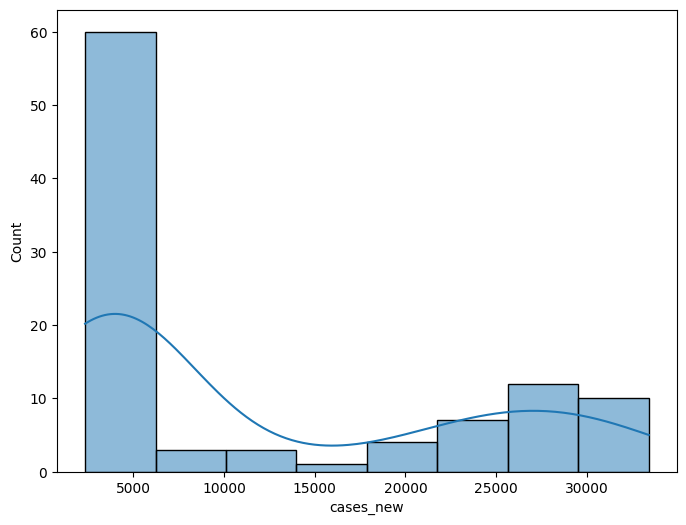

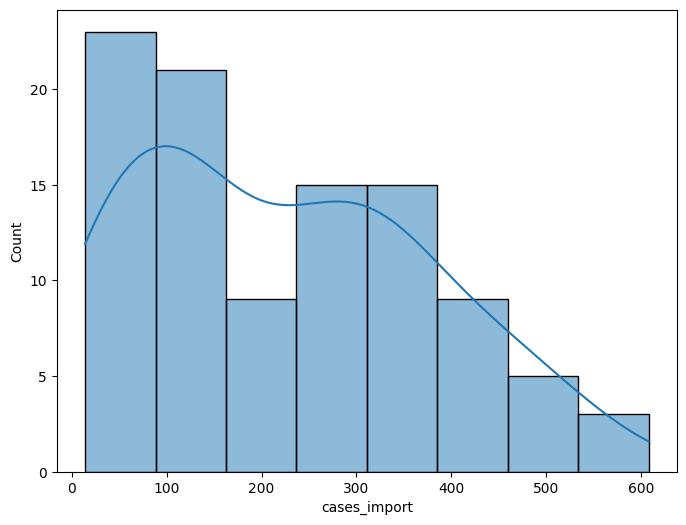

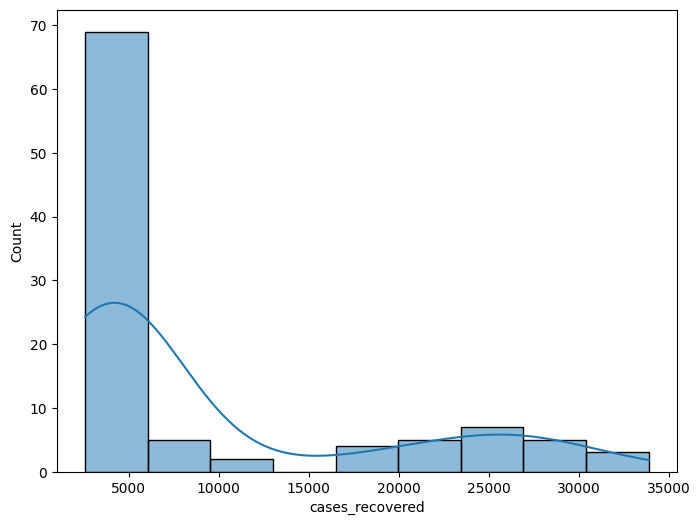

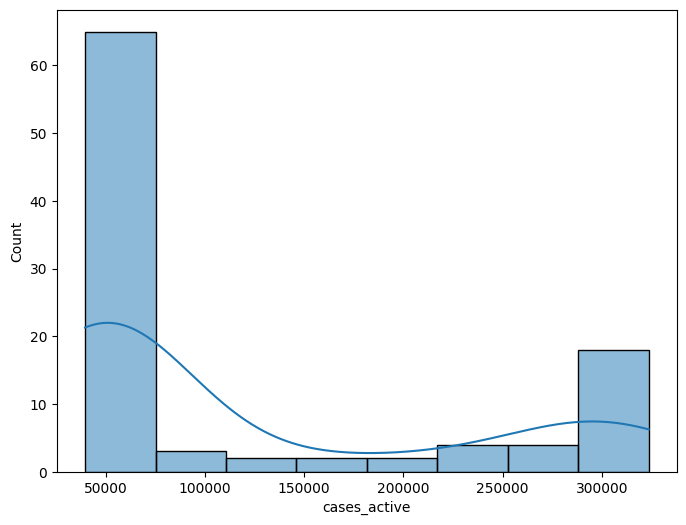

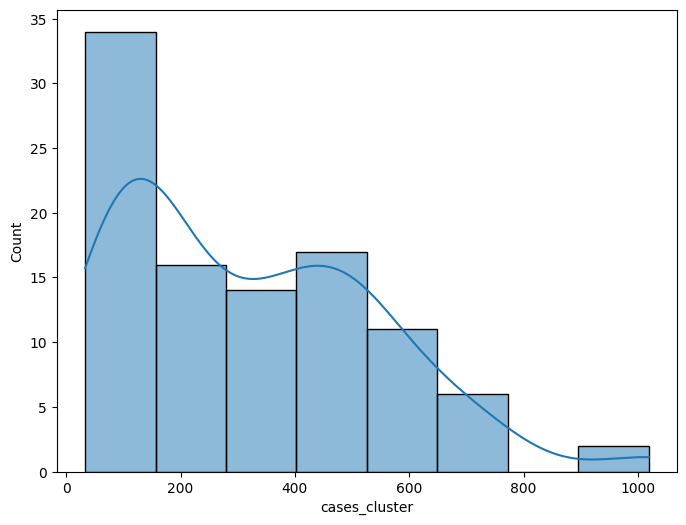

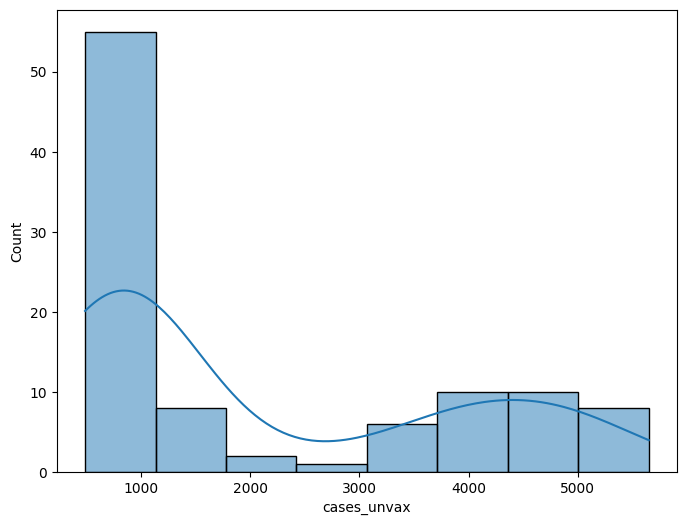

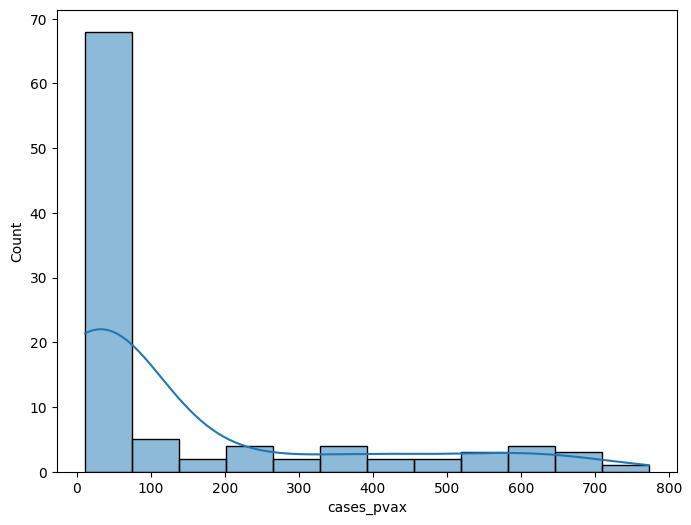

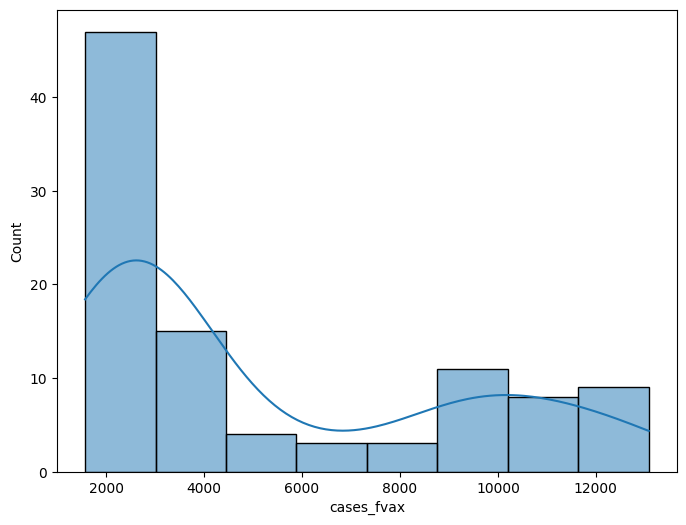

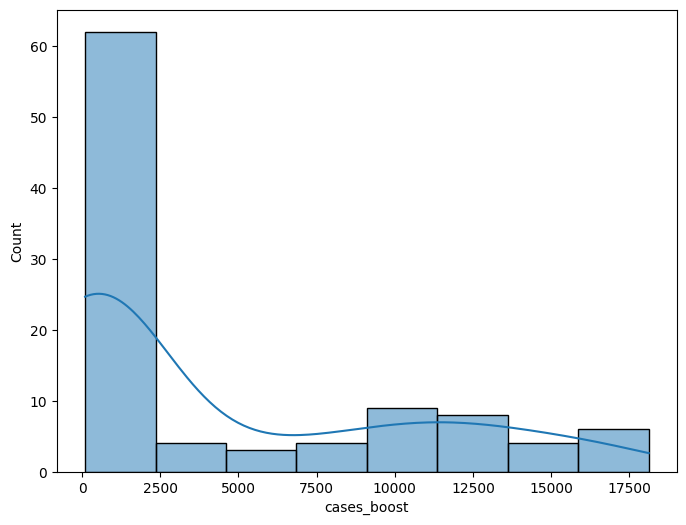

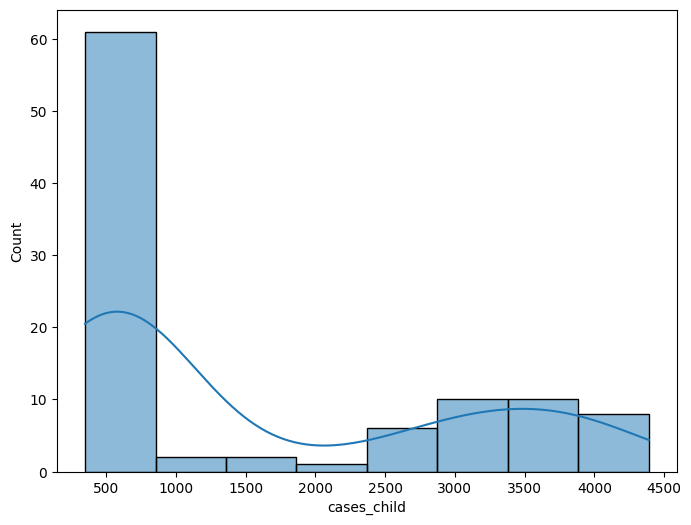

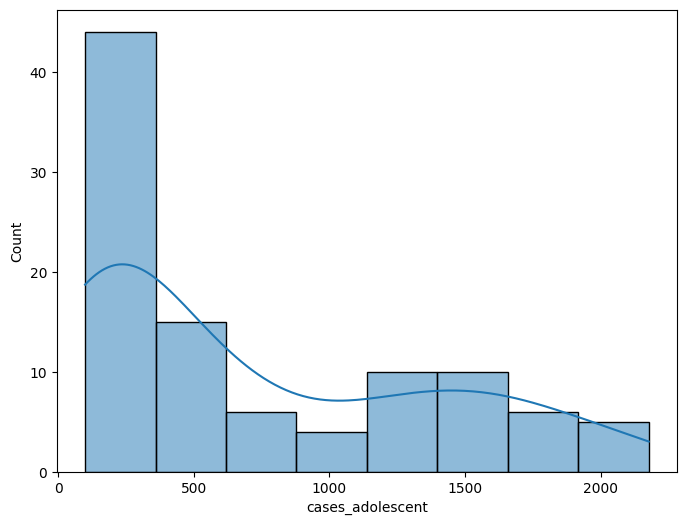

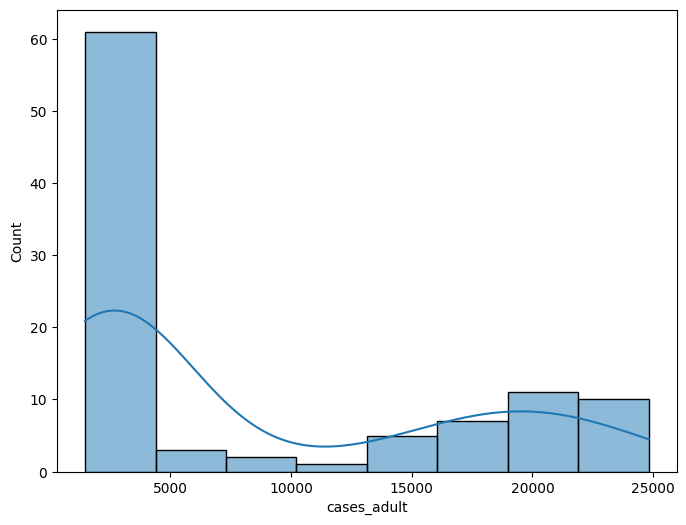

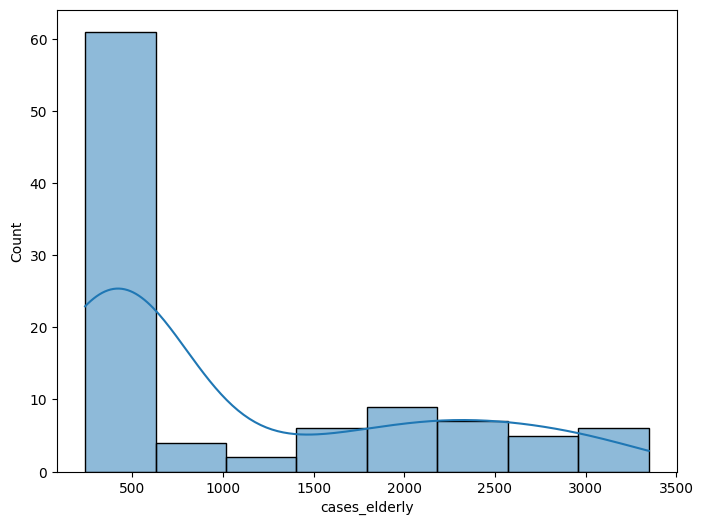

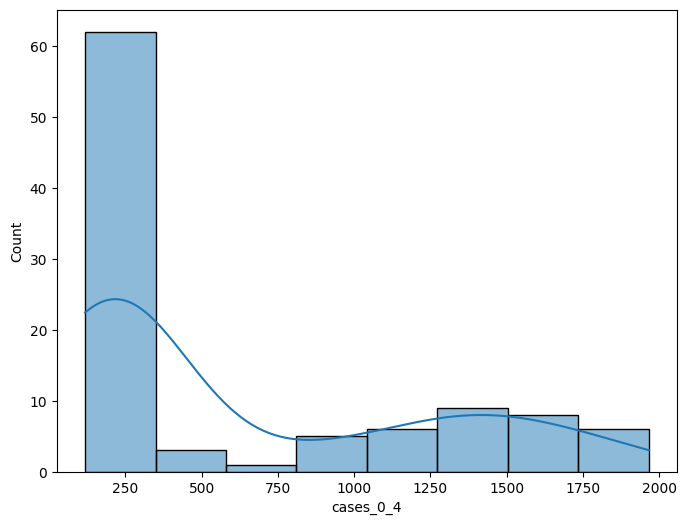

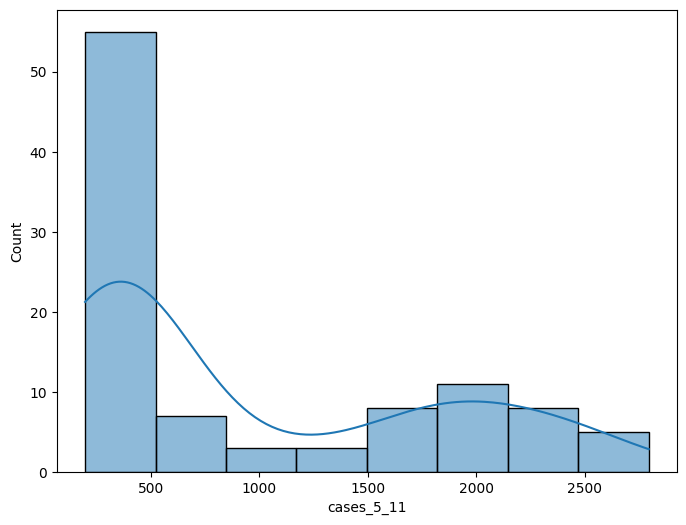

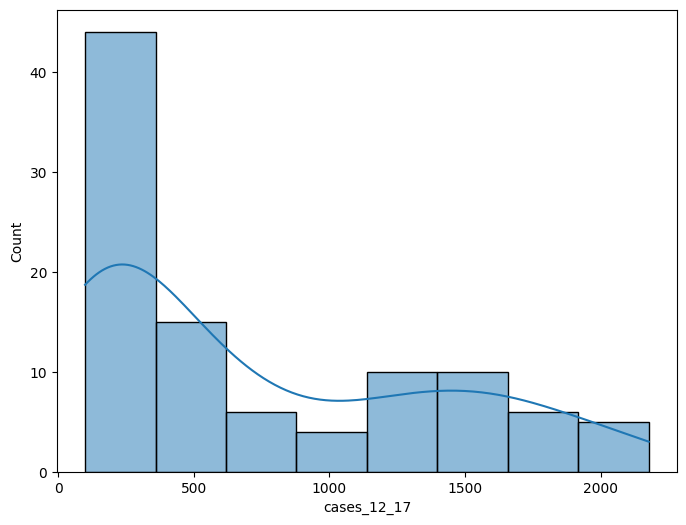

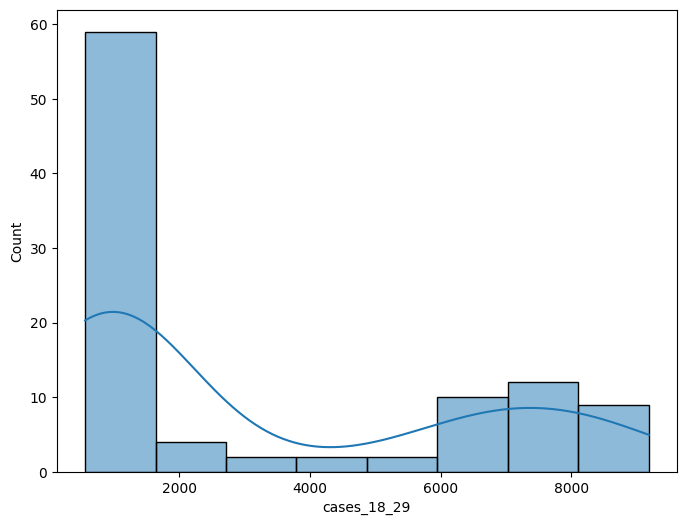

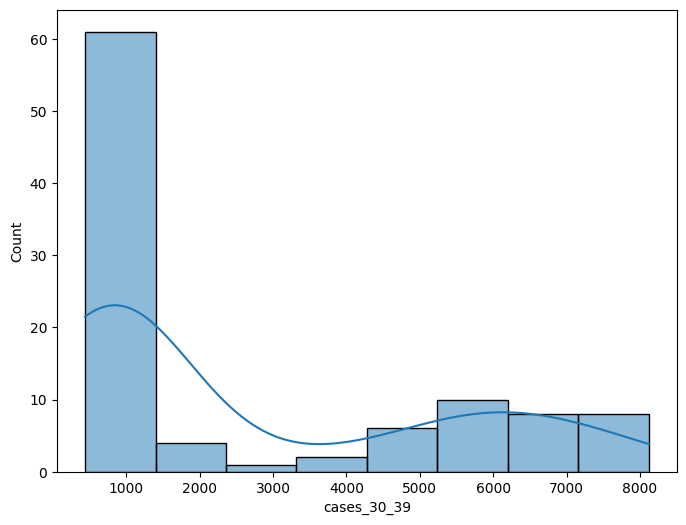

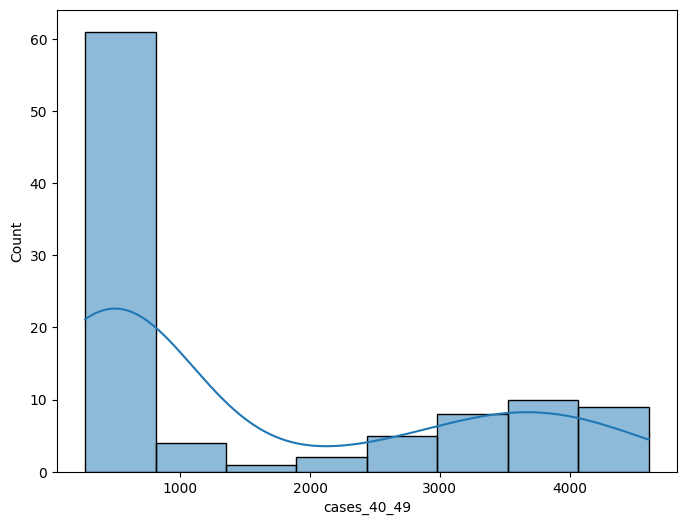

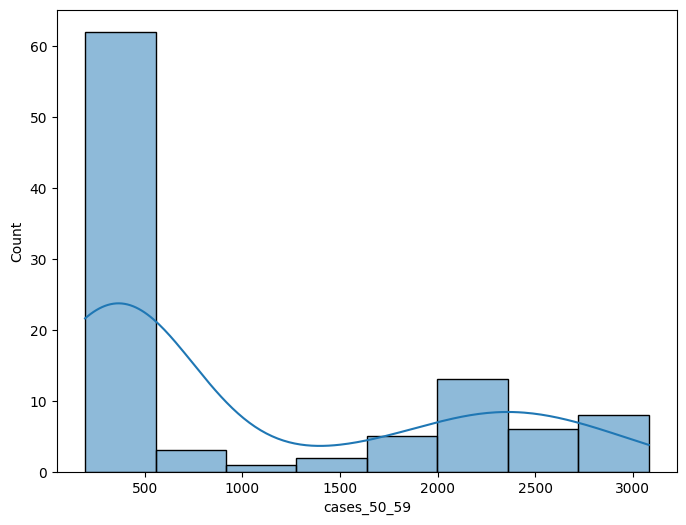

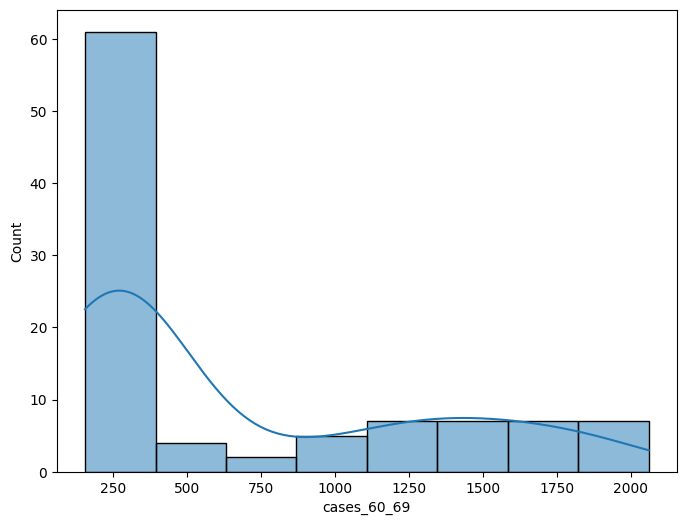

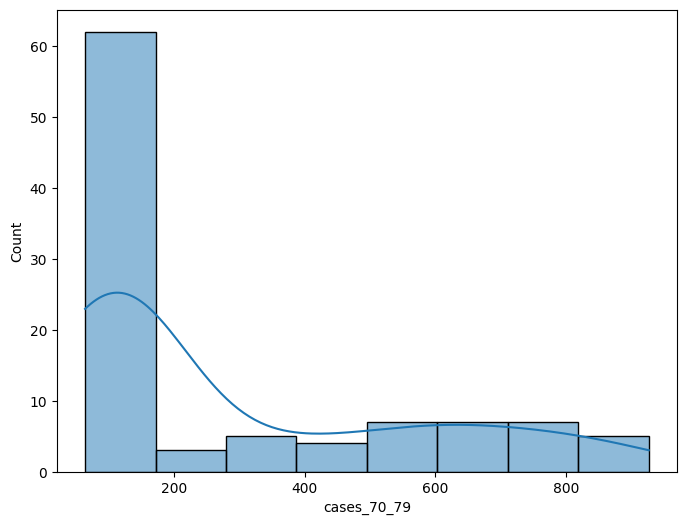

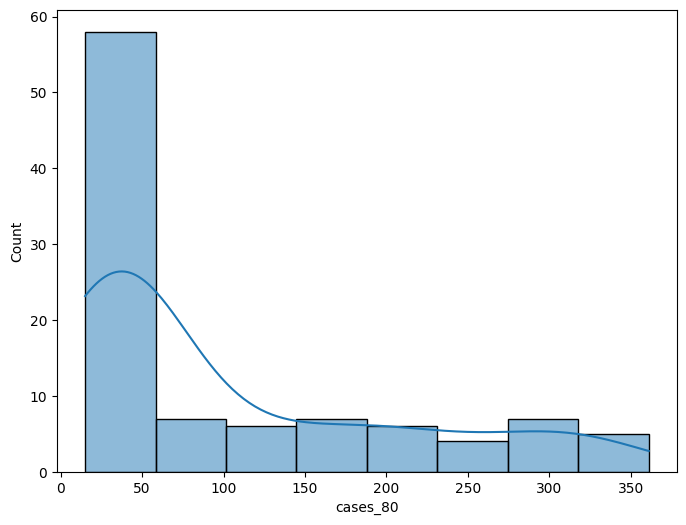

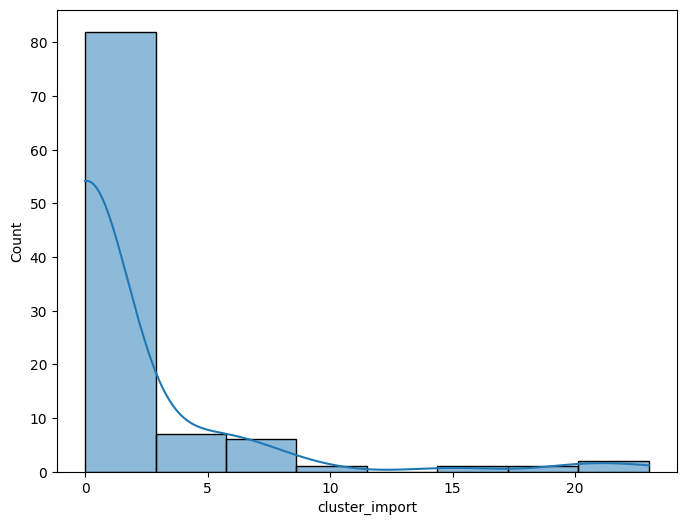

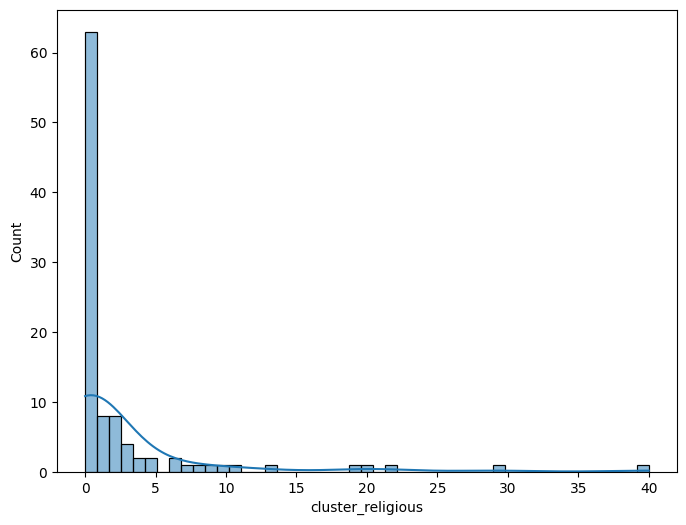

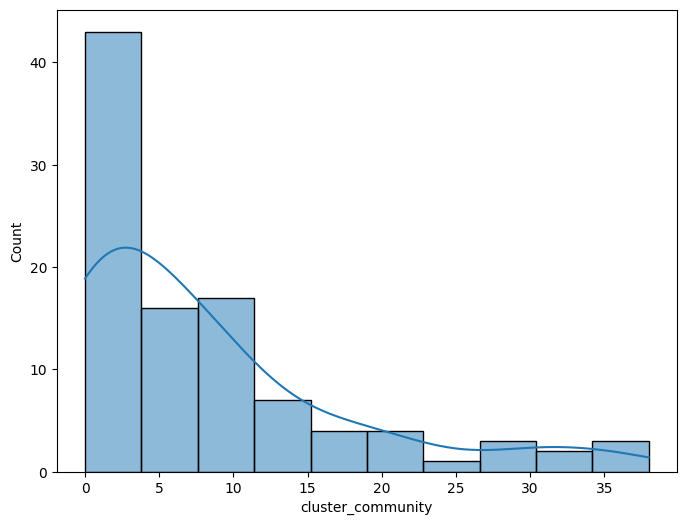

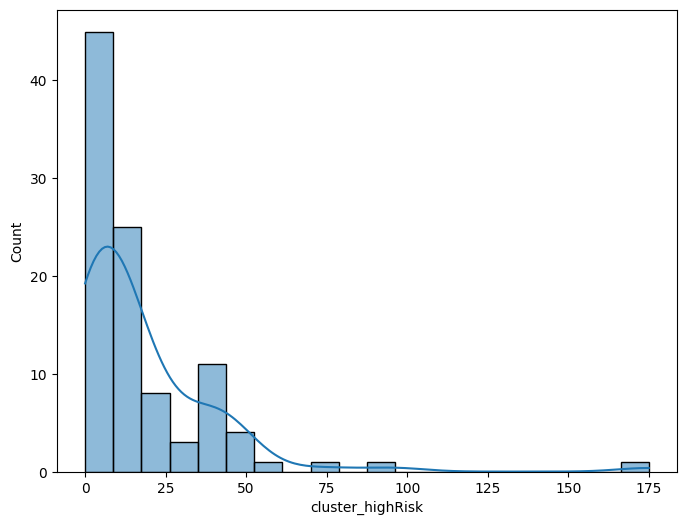

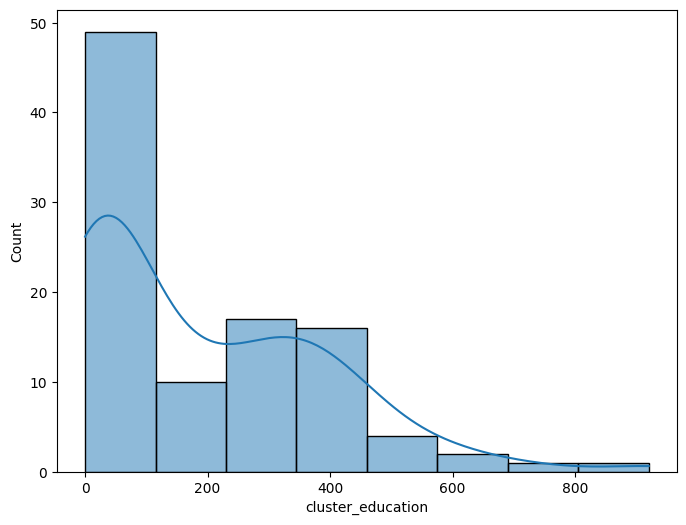

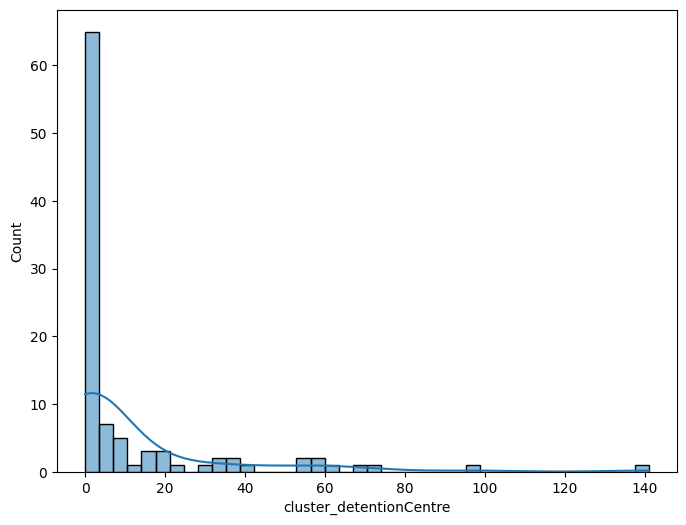

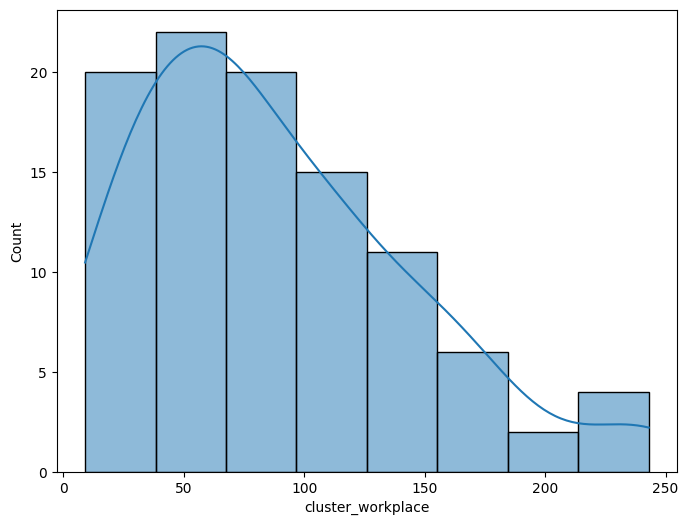

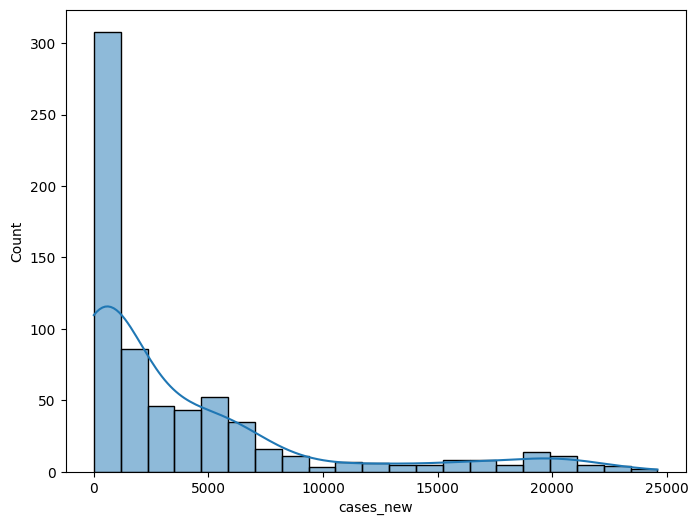

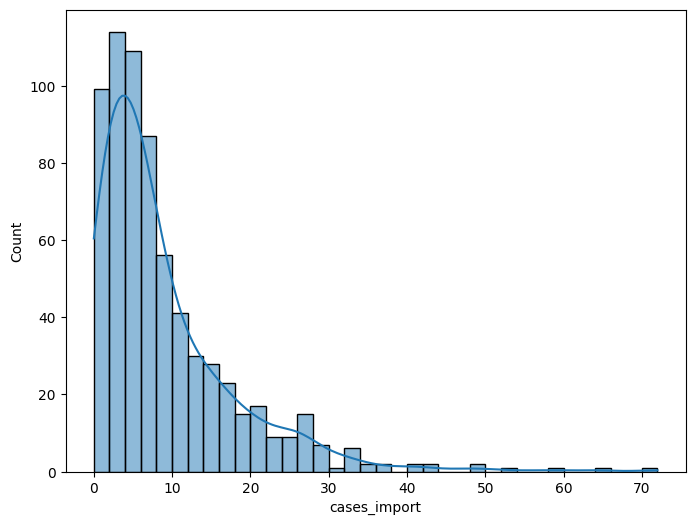

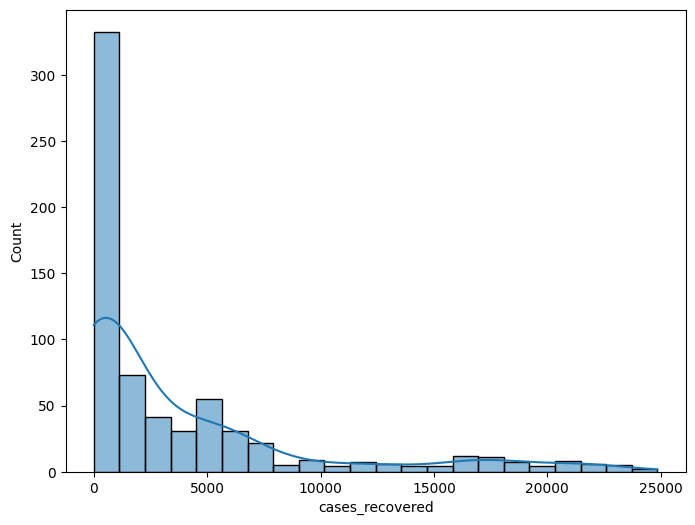

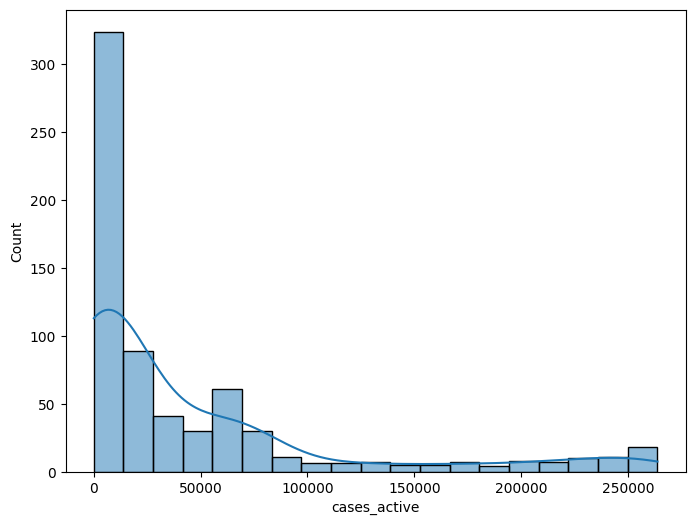

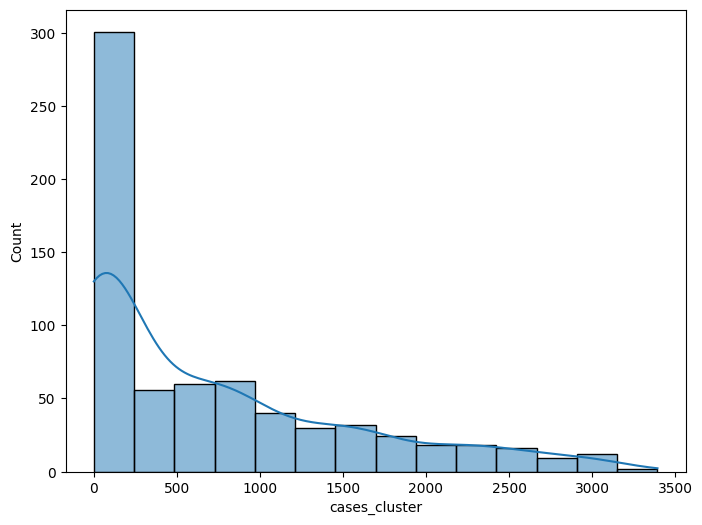

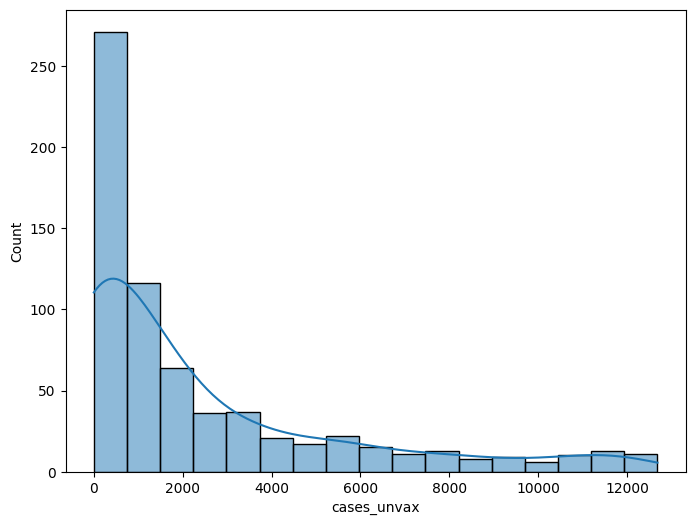

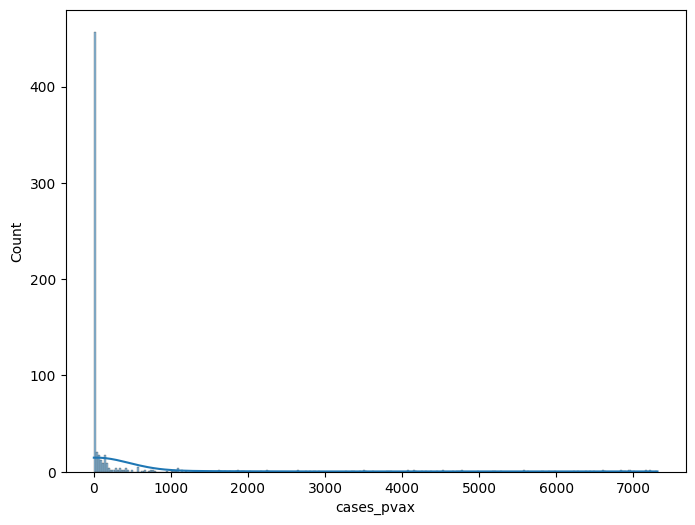

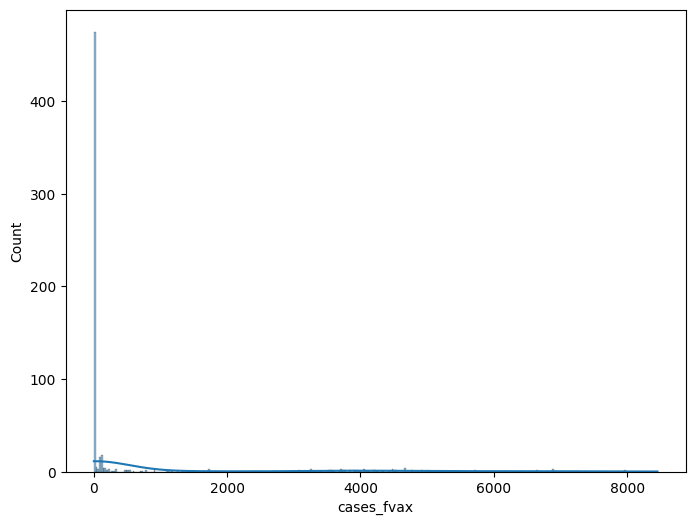

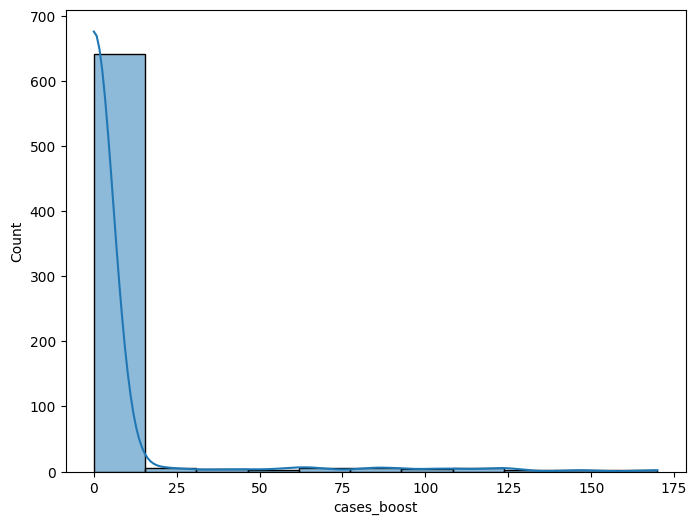

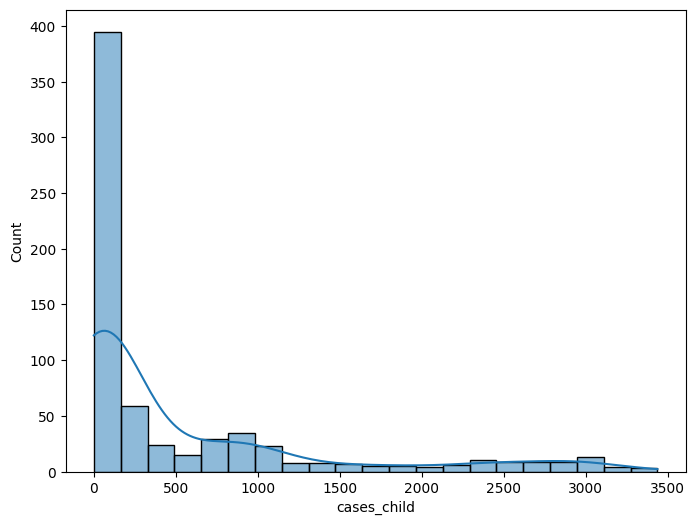

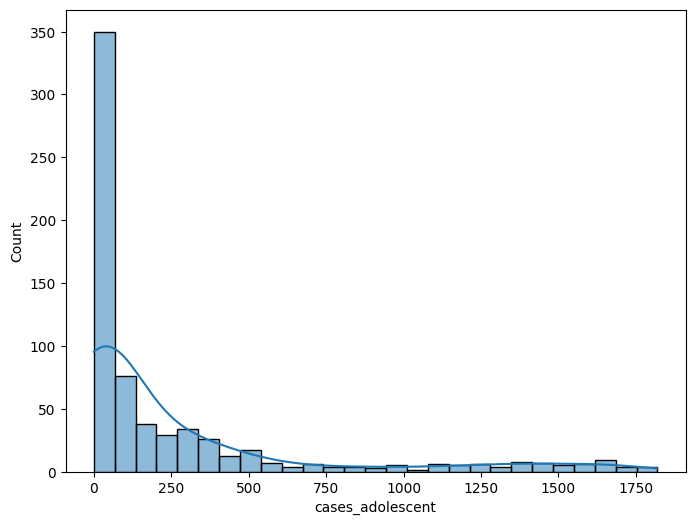

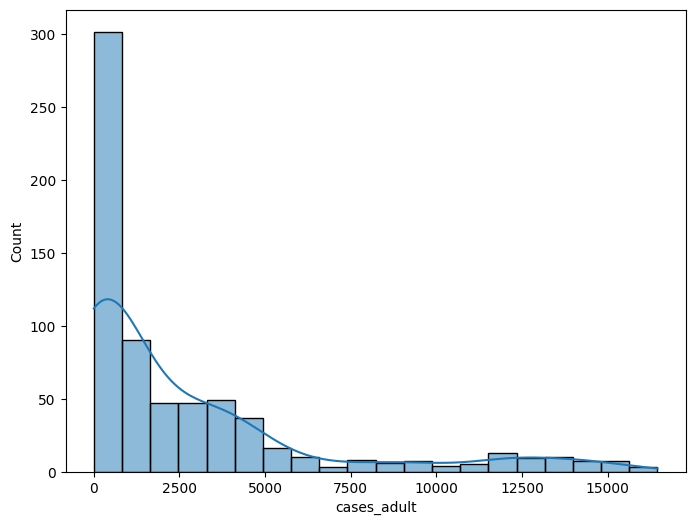

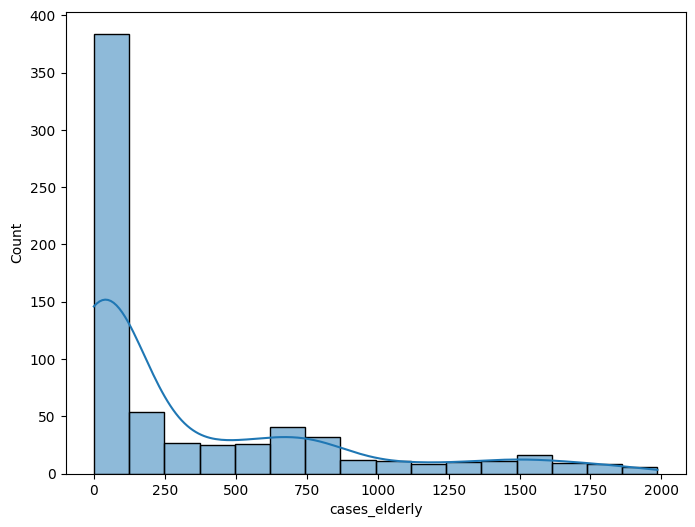

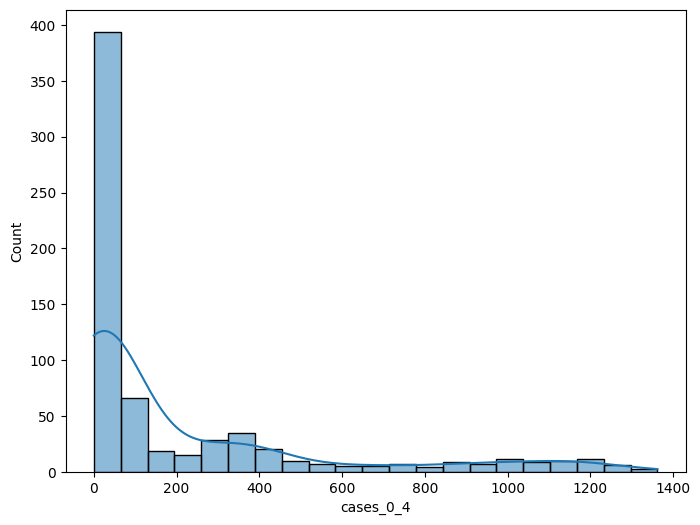

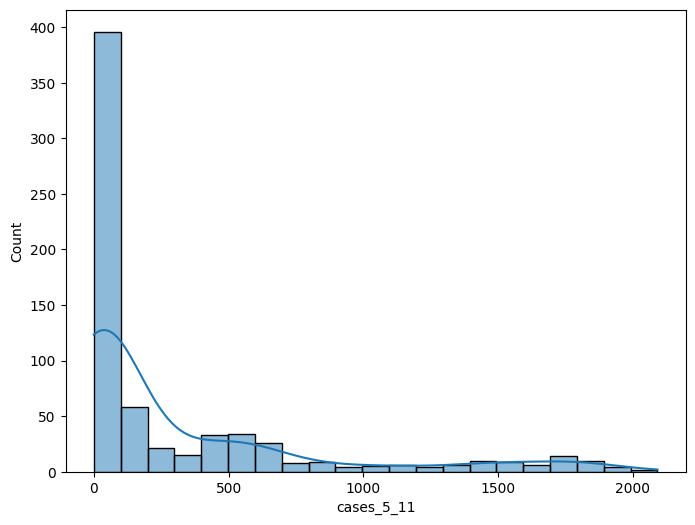

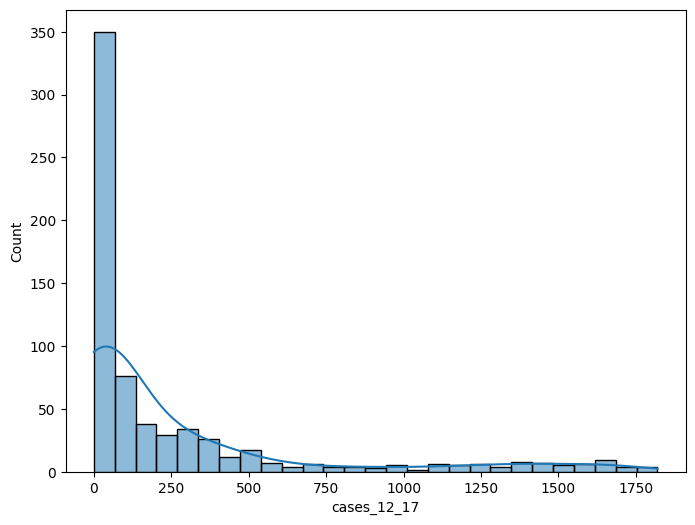

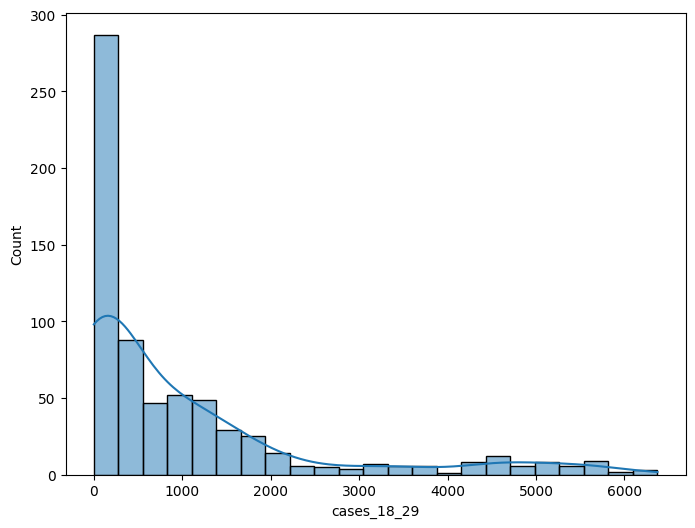

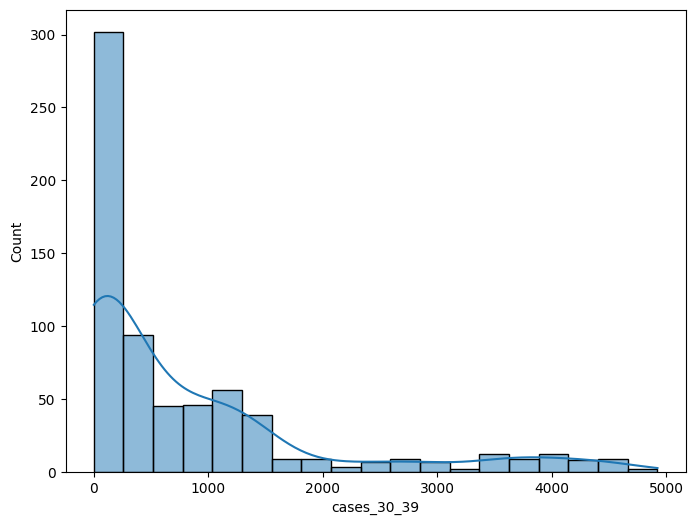

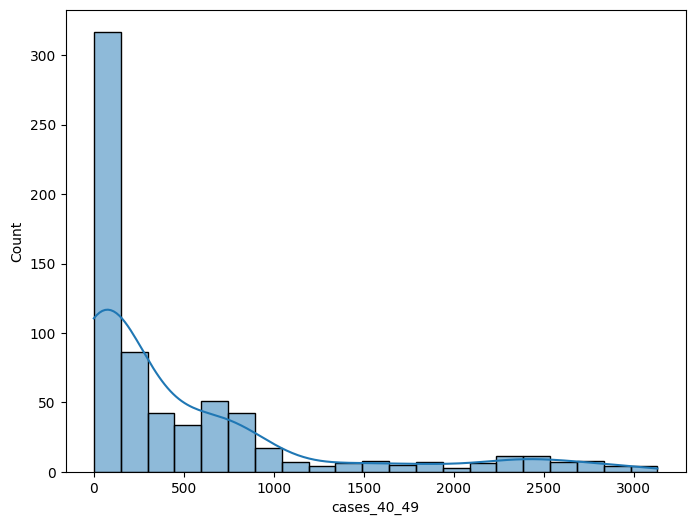

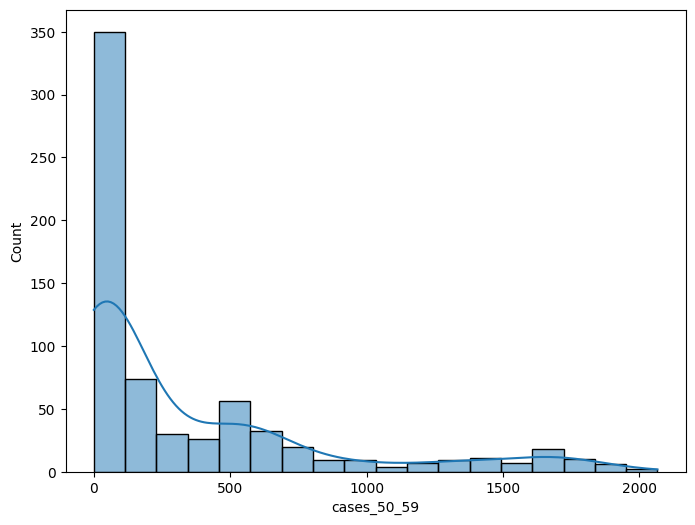

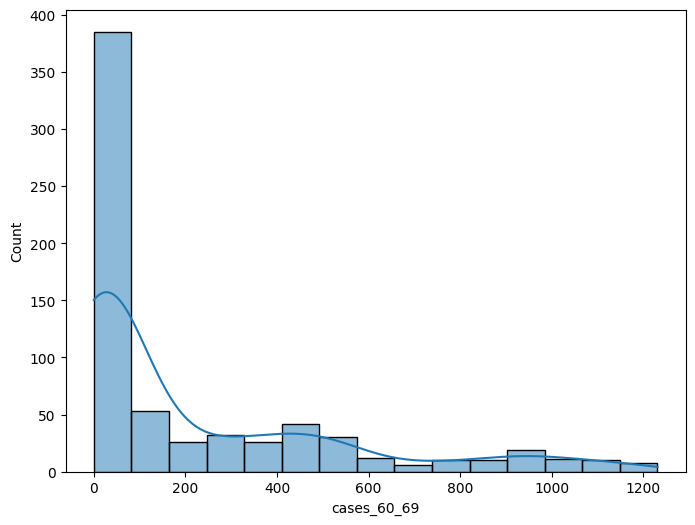

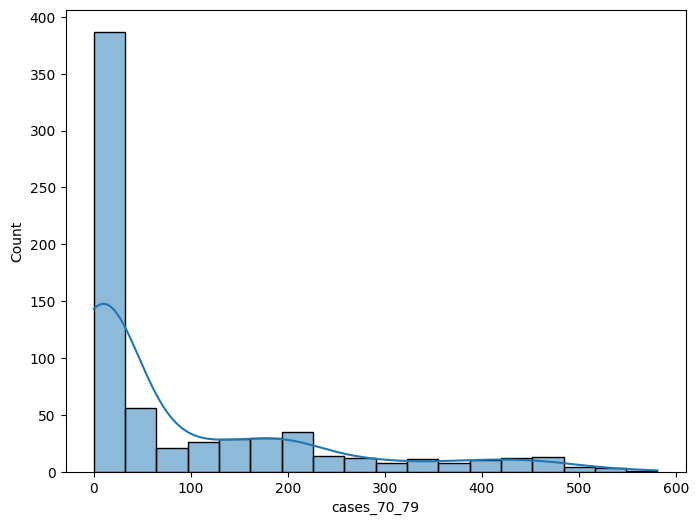

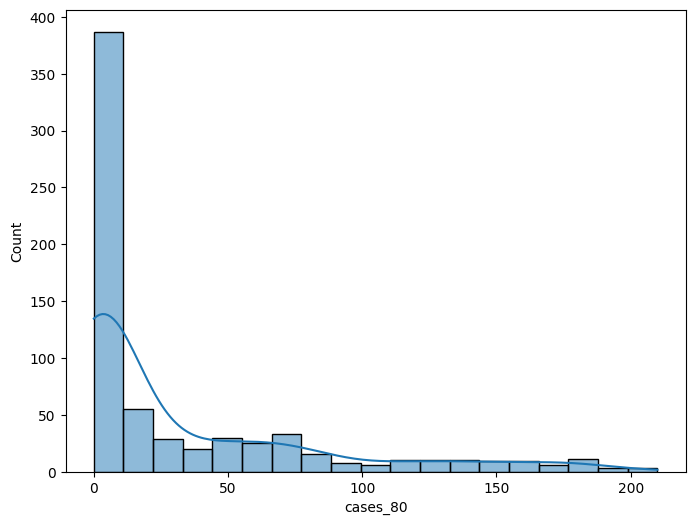

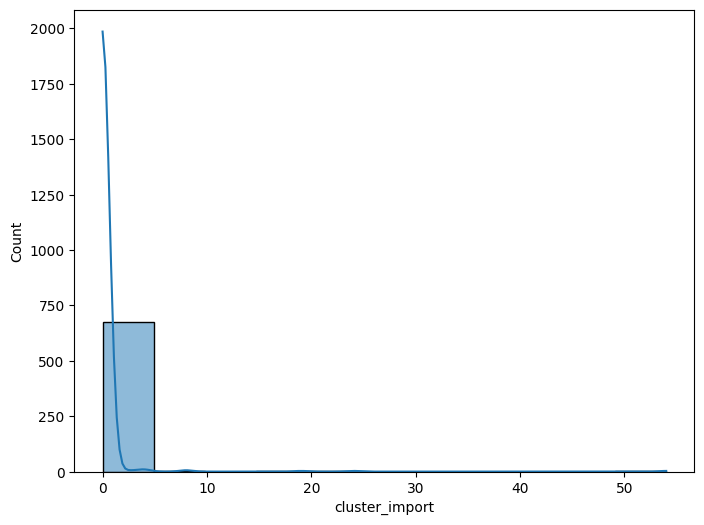

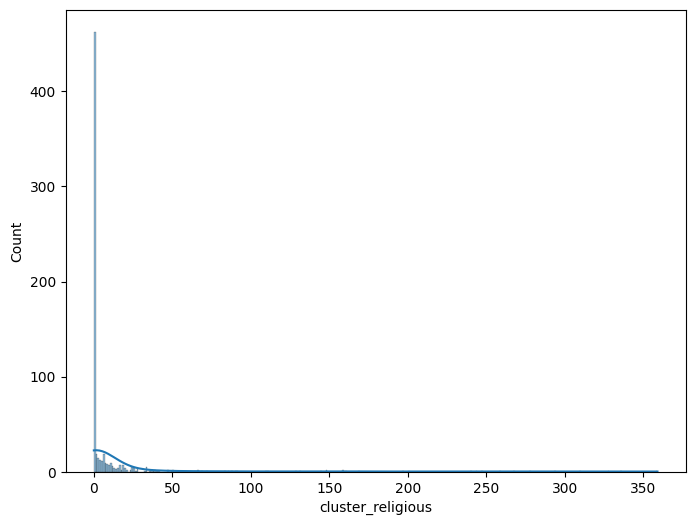

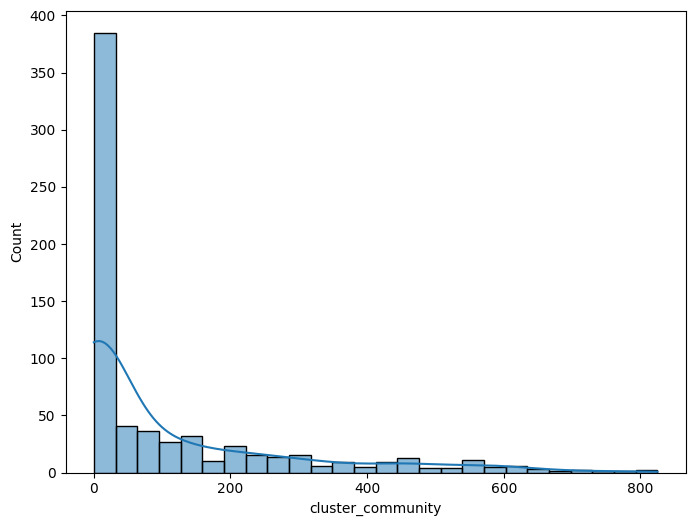

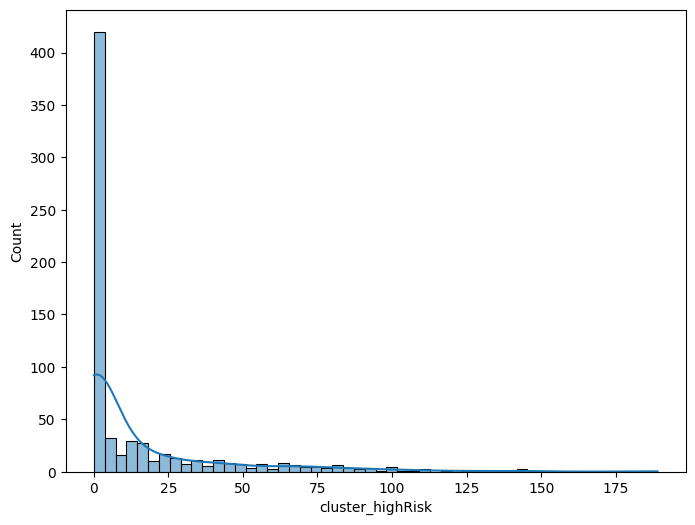

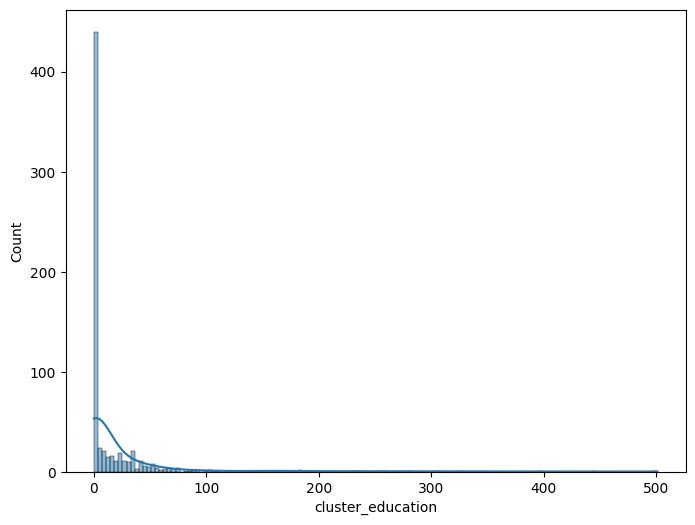

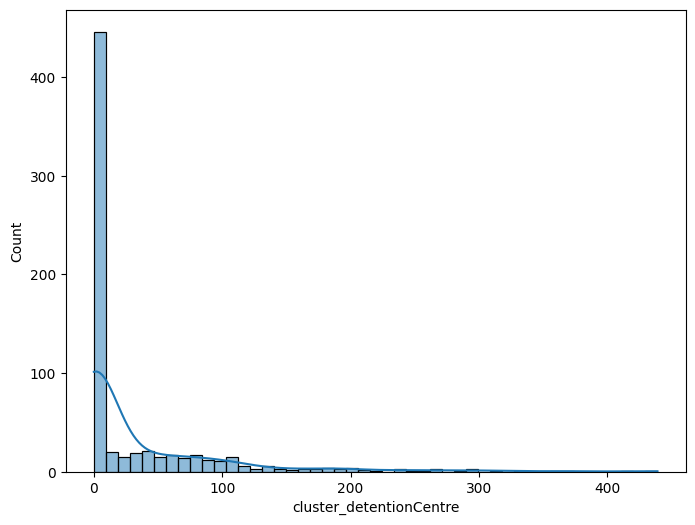

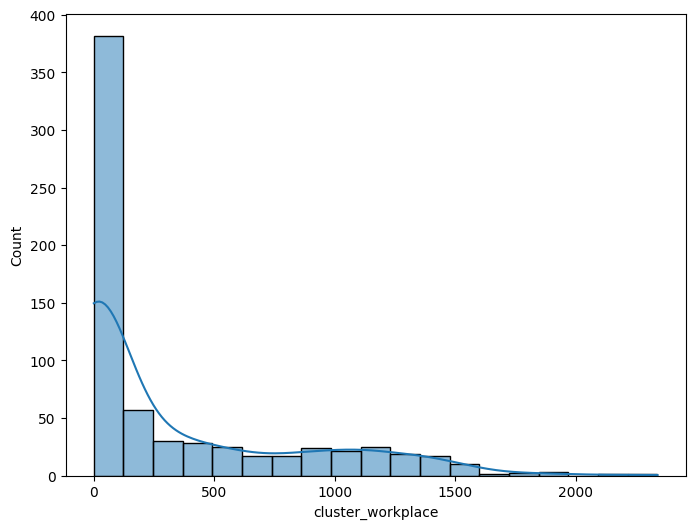

In [465]:
#%% PLOT THE CONTINUOUS DATA (DATA VISUALISATION)
for i in df_train.columns:
    sns.histplot(df_test[i], kde=True)
    plt.show()

for i in df_test.columns:
    sns.histplot(df_train[i], kde=True)
    plt.show()

In [466]:
# 4. Data inspection
# Plot some features using matplotlib
plot_cols = ['cases_new','cases_recovered']
plot_features = df_train[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df_train[plot_cols][:30]
plot_features.index = date_time[:30]
_ = plot_features.plot(subplots=True)


In [467]:
# Do a boxplot for the two potential abnormal features
df_train[['cases_new', 'cases_active']].boxplot()

<Axes: xlabel='date'>

In [468]:
# 5. Data cleaning
# Correct the abnormal value from the wv and max wv columns
volume = df_train['cases_active']
bad_volume = volume > 100000
mean_volume = volume.mean()
volume[bad_volume] = mean_volume
print(volume[bad_volume])

volume = df_test['cases_active']
bad_volume = volume > 100000
mean_volume = volume.mean()
volume[bad_volume] = mean_volume
print(volume[bad_volume])


536    45733.016176
537    45733.016176
538    45733.016176
539    45733.016176
540    45733.016176
           ...     
624    45733.016176
625    45733.016176
626    45733.016176
627    45733.016176
628    45733.016176
Name: cases_active, Length: 93, dtype: float64
67    120021.37
68    120021.37
69    120021.37
70    120021.37
71    120021.37
72    120021.37
73    120021.37
74    120021.37
75    120021.37
76    120021.37
77    120021.37
78    120021.37
79    120021.37
80    120021.37
81    120021.37
82    120021.37
83    120021.37
84    120021.37
85    120021.37
86    120021.37
87    120021.37
88    120021.37
89    120021.37
90    120021.37
91    120021.37
92    120021.37
93    120021.37
94    120021.37
95    120021.37
96    120021.37
97    120021.37
98    120021.37
99    120021.37
Name: cases_active, dtype: float64


In [469]:
# Check back the data with the describe
df_train[[ 'cases_active']].boxplot()
df_train.describe().transpose()

df_test[[ 'cases_active']].boxplot()
df_test.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
cases_new,100.0,11973.808081,11034.467603,2342.0,3464.00,4844.5,22876.50,33406.00
cases_import,100.0,224.990000,153.883105,14.0,94.75,218.5,334.25,608.00
cases_recovered,100.0,9415.300000,9226.279561,2584.0,3398.50,4753.5,11930.00,33872.00
cases_active,100.0,73421.002100,34133.341807,39615.0,42808.25,57657.5,120021.37,120021.37
cases_cluster,100.0,320.790000,225.743678,33.0,131.75,279.0,483.25,1019.00
cases_unvax,100.0,2087.390000,1717.484212,489.0,740.75,1031.5,3846.75,5649.00
cases_pvax,100.0,142.730000,207.250293,11.0,19.00,30.5,175.25,773.00
cases_fvax,100.0,5294.580000,3781.993457,1573.0,2363.50,3097.0,9119.00,13079.00
cases_boost,100.0,4386.570000,5682.907255,96.0,252.00,695.0,9553.25,18123.00
cases_child,100.0,1584.260000,1387.877251,349.0,492.75,735.5,3021.75,4389.00


In [470]:
# 8. Data normalization
train_mean = df_train.mean()
train_std = df_train.std()
train_df = (df_train - train_mean) / train_std
test_df = (df_test - train_mean) / train_std


In [471]:
# 9. Data windowing
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels
  
  def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [h]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)

    return ds
  
  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

In [472]:
# Test out the window class code
test_window = WindowGenerator(input_width=6,label_width=1,shift=1,train_df=train_df,test_df=test_df,label_columns=['T (degC)'])
print(test_window)

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']


In [473]:
print(train_df.shape)
print(test_df.shape)

(680, 30)
(100, 30)


In [474]:
# Test out the window class code
#test_window = WindowGenerator(input_width=6,label_width=1,shift=1,train_df=train_df,val_df=val_df,test_df=test_df,label_columns=['cases_new'])
test_window = WindowGenerator(input_width=6, label_width=1, shift=1, train_df=train_df, test_df=test_df, label_columns=['cases_new'])
print(test_window)

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['cases_new']


In [475]:
# Create a window for single-time-step single-output prediction
wide_window = WindowGenerator(24,24,1,train_df=train_df,test_df=test_df,label_columns=["cases_new"])
wide_window.plot(plot_col="cases_new")

In [476]:
model_single_step = keras.Sequential([
    # First LSTM layer with input shape
    keras.layers.LSTM(units=32, return_sequences=True, input_shape=(None, df_train.shape[1])),  # Input shape (timesteps, features)
    # Second LSTM layer
    keras.layers.LSTM(units=32, return_sequences=True),
    # Dense layer for output
    keras.layers.Dense(units=1)
])
# Summarize the model to check if it's built properly
model_single_step.summary()


c:\Users\suhaimi\AppData\Local\anaconda3\envs\machinelearning\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                  │ (None, None, 32)       │         8,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, None, 32)       │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, None, 1)        │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,417 (64.13 KB)

 Trainable params: 16,417 (64.13 KB)

 Non-trainable params: 0 (0.00 B)

In [477]:
"""
# 10. Create an RNN (LSTM) for the wide window
model_single_step = keras.Sequential()
model_single_step.add(keras.layers.LSTM(units=32,return_sequences=True))
model_single_step.add(keras.layers.LSTM(units=32,return_sequences=True))
model_single_step.add(keras.layers.Dense(units=1))
model_single_step.summary()"
"""


'\n# 10. Create an RNN (LSTM) for the wide window\nmodel_single_step = keras.Sequential()\nmodel_single_step.add(keras.layers.LSTM(units=32,return_sequences=True))\nmodel_single_step.add(keras.layers.LSTM(units=32,return_sequences=True))\nmodel_single_step.add(keras.layers.Dense(units=1))\nmodel_single_step.summary()"\n'

In [478]:
# Compile and train
model_single_step.compile(optimizer='adam',loss='mse',metrics=["mae"])

In [447]:
# Include mlflow into workflow
import mlflow
mlflow.set_experiment('Covid19 Prediction')

<Experiment: artifact_location='file:///c:/Users/suhaimi/Desktop/Capston%20Project/capstone%20project%201/mlruns/997731555158525428', creation_time=1741587710962, experiment_id='997731555158525428', last_update_time=1741587710962, lifecycle_stage='active', name='Covid19 Prediction', tags={}>

In [482]:
# Trained Model with MLflow logging
with mlflow.start_run()as run:
    mlflow_callback = mlflow.keras.MlflowCallback(run)
    run_id = run.info.run_id
    log_path = f"log/{run_id}"
    #ts= keras.callback.TensorBoard(log_dir=log_path)
    history_single = model_single_step.fit(wide_window.train,validation_data=None,epochs=10,batch_size=32,callbacks=[mlflow_callback])
    mlflow.keras.log_model(model_single_step,artifact_path="model")


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.8177 - mae: 0.5871
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1963 - mae: 0.2744
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1114 - mae: 0.1854
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0771 - mae: 0.1500
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0733 - mae: 0.1383
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0651 - mae: 0.1312
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0654 - mae: 0.1333
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0601 - mae: 0.1287
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0594 - mae: 0.1269
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0512 - mae: 0.1208


2025/03/10 15:38:28 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/03/10 15:38:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [483]:
# Train the model
history_single = model_single_step.fit(wide_window.train,epochs=25,batch_size=32)

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0474 - mae: 0.1161
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0418 - mae: 0.1101
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0421 - mae: 0.1083
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0404 - mae: 0.1063
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0469 - mae: 0.1110
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0410 - mae: 0.1063
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0373 - mae: 0.1019
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0380 - mae: 0.0993
Epoch 9/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0355 - mae: 0.0997
Epoch 10/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0331 - mae: 0.0967
Epoch 11/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0322 - mae: 0.0961
Epoch 12/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0323 - mae: 0.0946
Epoch 13/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st

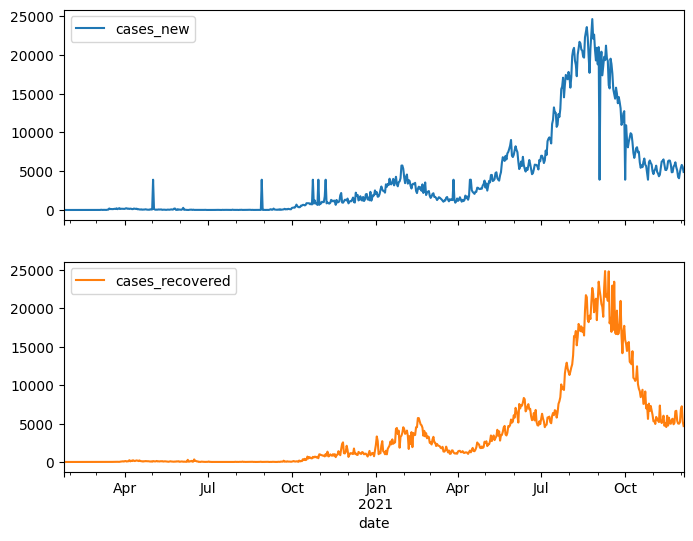

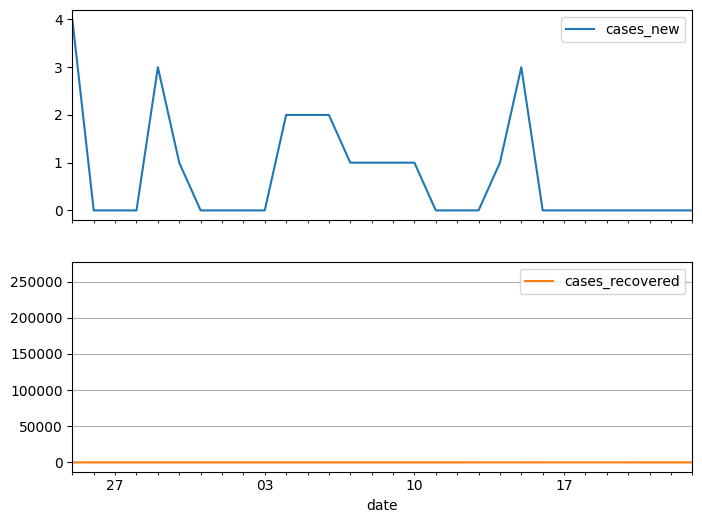

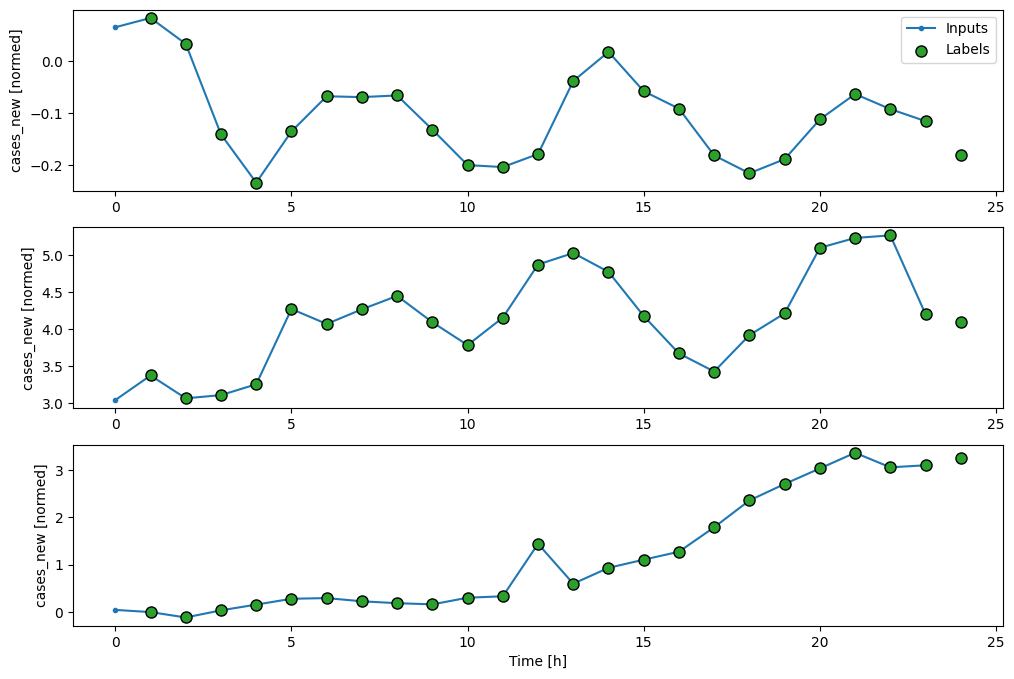

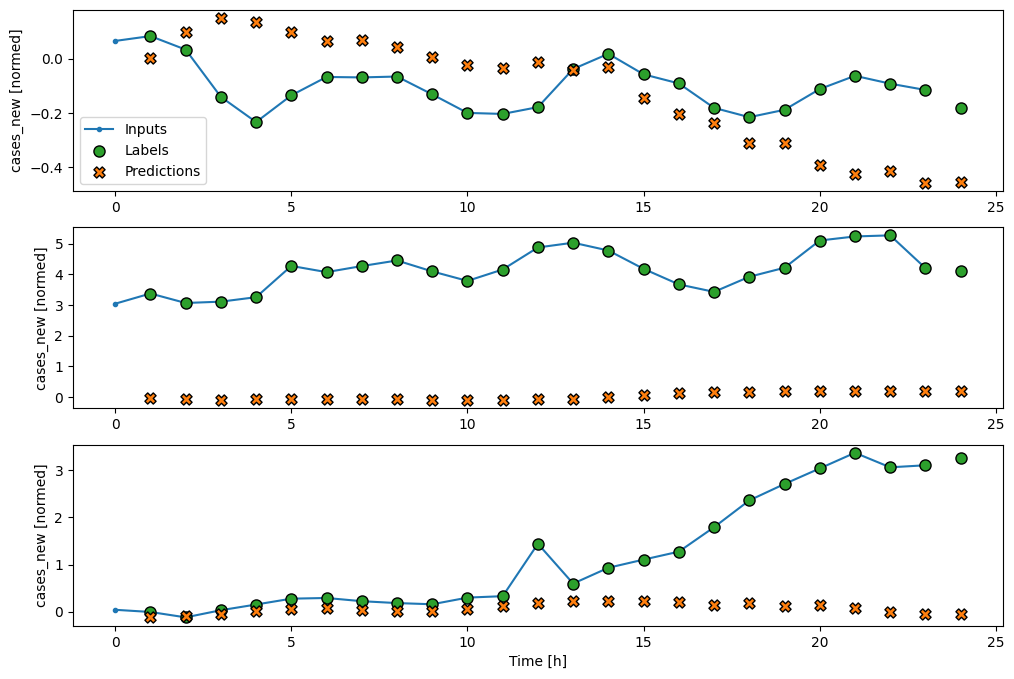

In [484]:
# Show example prediction
wide_window.plot(model=model_single_step,plot_col="cases_new")
plt.show()